<h3 style="text-align: center;"><strong>ESCUELA DE INGENIERÍA INFORMÁTICA - UNIVERSIDAD DE SEVILLA</strong></h3>
<h3 style="text-align: center;"><strong>GRADO EN INGENIERÍA INFORMÁTICA-TECNOLOGÍAS INFORMÁTICAS</strong></h3>
<h1 style="font-size: 1em; text-align: center;"><strong>MATEMÁTICA DISCRETA<br /></strong></h1>
<h2 style="font-size: 1.17em; text-align: center;"><strong>Práctica 2. Diseño de estrategias ganadoras en juegos.Números de independencia y clique.<br /></strong></h2>
<p>En esta primera sesión nos marcamos los siguientes objetivos:</p>
<p>1. <a href="#nucleo">Conjuntos independientes, absorbentes y núcleo</a> de un digrafo (grafo dirigido). </p>
<p>2. <a href="#juegos">Aplicación al diseño de estrategias ganadoras</a> en juegos.</p>
<p>3. <a href="#indep-clique">Número de independencia y número de clique</a> de un grafo.</p>
<p> </p>
<p>Al final de la práctica hay una  <a href="#cuestiones">colección de otros ejercicios propuestos.</a></p>
<p> </p>
<p><a name="nucleo"></a><strong style="font-size: 1.5em;">1. Núcleo de un digrafo.</strong></p>
<p>Dado un <strong>digrafo</strong> $D=(V,A)$, se dice que un conjunto de vértices $S \subseteq V$ es un conjunto <strong>independiente</strong> de vértices si no existen aristas entre ellos. (Esta definición también vale para el caso de grafos).</p>
<p> Por ejemplo, en el siguiente digrafo, el conjunto $\{1,3,5\}$ es un conjunto independiente. </p>

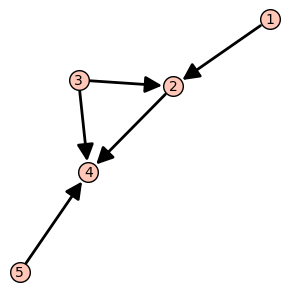

In [1]:
DH1=DiGraph({1:[2],2:[4],3:[2,4],5:[4]})
DH1.plot(figsize=4)

<p>Por otro lado, un conjunto de vértices $S$ en un <strong>digrafo</strong> se dice que es un conjunto <strong>absorbente</strong> de vértices si cualquier vértice fuera de este conjunto tiene al menos una arista dirigida hacia uno de los vértices de $S$.  </p>
<p>En el grafo siguiente, el conjunto $\{2,4\}$ es un conjunto absorbente:</p>

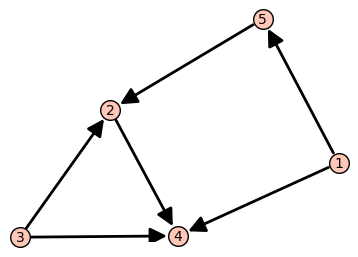

In [2]:
DH2=DiGraph({1:[4,5],2:[4],3:[2,4],5:[2]})
DH2.plot(figsize=4)

<p>Todo conjunto $S$ de vértices que sea al mismo tiempo independiente y absorbente se denomina <strong>núcleo</strong> del digrafo.</p>

<p>Es importante destacar que el núcleo no siempre existe, y en caso de existir no tiene por qué ser único. Por ejemplo, es fácil ver que el siguiente digrafo no tiene núcleo:</p>

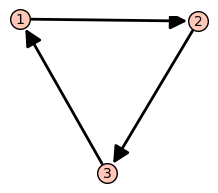

In [3]:
DH3=DiGraph({1:[2],2:[3],3:[1]})
DH3.plot(figsize=3)

<p>Mientras que en el siguiente digrafo hay dos núcleos, el conjunto $\{1,3\}$ y el conjunto $\{2,4\}$:</p>

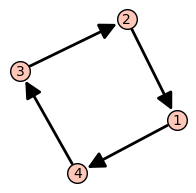

In [4]:
DH4=DiGraph({1:[4],2:[1],3:[2],4:[3]})
DH4.plot(figsize=3)

<h2><br class="Apple-interchange-newline" /><a name="juegos"></a><span style="font-size: x-large;"><strong>2. Aplicación al diseño de estrategias ganadoras en juegos</strong></span></h2>
<p>El concepto de nucleo de un digrafo podemos utilizarlo para obtener estrategias ganadoras en algunos juegos. En efecto, un juego para dos jugadores se puede modelar mediante un digrafo de la siguiente forma: </p>
<p>Construimos un digrafo $D$ que tenga tantos vértices como posibles posiciones tenga el juego, y una arista dirigida de la posición $p$ a la posición $q$ si es posible pasar de la posición $p$ a la posición $q$ mediante un movimiento del juego. Las posiciones ganadoras del juego se corresponderán con vértices de valencia de salida igual a 0.</p>
<p>Por ejemplo, consideremos el siguiente juego:</p>


<p><span style="font-size: medium;"><strong>EJEMPLO 1 (SUMAR 31)</strong>.</span> El primer jugador dice un número (entero) del $1$ al $3$. A continuación cada jugador, alternativamente, va sumando $1$, $2$ o $3$ a la cifra de su oponente. Ganará el jugador que llegue a sumar exactamente $31$.</p>
<p>Este juego puede ser modelado con el siguiente grafo: Los vértices son los números enteros del $1$ al $31$ y de cada vértice $i$ salen aristas a los vértices $i+1$, $i+2$ y $i+3$, excepto para el vértice $i=29$, del que sólamente salen aristas a $30$ y $31$, del vértice $i=30$ sale una única arista al $31$ y del vétice $i=31$ no sale ninguna arista. O sea $(i,j)$ es una arista si $i<j<i+4$, siendo $1\le i,j\le 31$.</p>

In [7]:
n=31
V=[1..n]  #Definimos los vértices del grafo
E=[(i,j) for (i,j) in cartesian_product([V,V]) if (i<j<i+4)]  #Definimos las aristas del grafo

DJ1=DiGraph()          #Digrafo vacío
DJ1.add_vertices(V)    #Añadimos los vértices
DJ1.add_edges(E)       #Añadimos las aristas

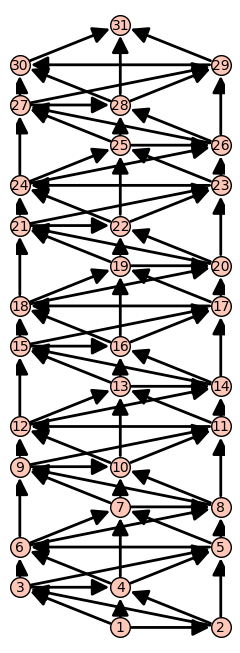

In [8]:
lista_pos=[(i,[100*(i%3),20*(i+(i)%2)]) for i in DJ1.vertices()]
posiciones=dict(lista_pos)
DJ1.plot(pos=posiciones,figsize=10)

<p>Es fácil darse cuenta de que el jugador que consiga decir el número $27$ tiene todo a su favor para ganar. Pero entonces, quien diga el $23$ es el que ganará el juego (si después hace los movimientos adecuados). Razonando de esta manera, vemos que los objetivos parciales del juego deben ser $S=\{3,7,11,15,19,23,27,31\}$. Estos objetivos parciales cumplen que:</p>
<p>1º. Si un jugador dice un número que está en $S$, el otro jugador forzosamente dirá un número que no está en $S$ (puesto que $S$ es un conjunto <strong>independiente</strong>).</p>
<p>2º. Si un jugador dice un número que no está en $S$, el otro jugador siempre tiene la posibilidad de decir un número de $S$ (puesto que $S$ es un conjunto <strong>absorbente</strong>).</p>
<p>Por lo tanto, el conjunto $S$ es un <strong>núcleo</strong> del digrafo que modela el juego. Y nuestro objetivo entonces debe ser ocupar las posiciones que pertenezcan al núcleo, puesto que así nuestro adversario saldrá obligatoriamente de estas posiciones<em> ganadoras </em>y, a su vez, desde la situación que nos deje el contrincante, siempre podremos acceder a ellas para finalizar en la posición $31$, que es la posición ganadora en este juego.  </p>
<p>Puesto que la primera posición de $S$ es el número $3$, el jugador que empieza tiene la victoria asegurada eligiendo este número en primer lugar, y realizando en todo momento movimientos que le lleven a posiciones del núcleo. Análogamente, si nuestro contrincante es el primero en elegir número, y en algún momento del juego no elige una posición del núcleo, también tenemos asegurada la victoria.</p>
<p>Es decir, para diseñar una estrategia ganadora en un juego debemos buscar un <strong>núcleo</strong> del digrafo que modela dicho juego <strong>que contenga a la posición ganadora</strong> (recordemos que el núcleo no tiene por qué existir ni por qué ser único). Si esto es posible, entonces se puede diseñar una <em>estrategia ganadora</em> para el juego. Para ganar, basta hacer en todo instante un movimiento que te lleve a una posición dentro del núcleo; por ser independiente este conjunto, haga el movimiento que haga el adversario, éste acaba en una posición fuera del núcleo; por ser absorbente, tú siempre puedes conseguir que tu siguiente movimiento te devuelva al núcleo. </p>
<p>Es importante notar que las posiciones ganadoras del juego se corresponden en el digrafo con vértices de <span style="text-decoration: underline;">valencia de salida igual a $0$</span>, por lo que el núcleo que estamos buscando debe contener a estos vértices.</p>
<p> </p>
<p>Aunque el concepto de núcleo no está implementado en Sage, damos a continuación una rutina que permite calcular el núcleo <strong>que contenga a los vértices de valencia de salida $0$</strong> (posiciones ganadoras), en caso de que exista. Esta función recibe como parámetro un objeto de tipo Digraph y devuelve una lista formada por los vértices del núcleo.</p>
<p><strong>¡OJO! La función kernel sólo funciona con grafos que tienen vértices cuya valencia de salida es 0.</strong></p>

In [9]:
def outdegree0(digrafo):
    '''
    Recibe un grafo dirigido y devuelve la lista de vértices con valencia de salida igual a 0.
    Esta es una función auxiliar usada por la función "kernel".
    '''
    degree0=[]
    for v in digrafo.vertices():
        if digrafo.out_degree(v)==0:
            degree0.append(v)
    return degree0
    
def kernel(digrafo0):
    '''
    Recibe un grafo dirigido y devuelve una lista con los vértices del núcleo.
    '''
    digrafo=copy(digrafo0)
    degree0=outdegree0(digrafo)
    if len(degree0)==0:
        print("Esta función no puede calcular el núcleo de este digrafo pues no tiene vértices de valencia de salida igual a 0")
        return 
    kernel=[]
    while degree0!=[]:
        for v in degree0:
            kernel.append(v)
            for u in digrafo.neighbors(v):
                digrafo.delete_vertex(u)
            digrafo.delete_vertex(v)
        degree0=outdegree0(digrafo)
    if digrafo.order()<1:
        kernel.sort()
        return kernel
    else:
        print("No existe el núcleo")

<p><span>Hemos definido dos funciones: </span><em>outdegree0</em><span> y </span><em>kernel</em><span>.</span></p>
<p>- La primera lo que hace es calcular los vértices que tienen valencia de salida igual a 0, <span style="text-decoration: underline;">ya que queremos que las posiciones ganadoras (que son vértices de valencia de salida 0) pertenezcan al núcleo</span>. </p>
<p>- La segunda lo que hace es calcular el núcleo en el caso de que modelemos un juego. Para ello, encuentra (usando la primera función) los vértices de valencia de salida igual a 0, después elimina dichos vértices y sus vecinos y vuelve a calcular aquellos que, en el nuevo grafo, tienen valencia de salida 0.</p>
<p>Si aplicamos esta rutina al grafo que modelaba el juego anterior (sumar 31), obtenemos el conjunto $S$ de objetivos parciales que ya habíamos deducido antes. </p>

In [10]:
kernel(DJ1)

[3, 7, 11, 15, 19, 23, 27, 31]

<p><strong><strong>EJERCICIO</strong> 1:</strong> Consideremos ahora la variante del juego del ejemplo 1 ("sumar 31") en el que <span style="text-decoration: underline;">pierde</span> el jugador que llega a 31. </p>
<p>a) Encontrar el grafo que modela esta variante del juego y diseñar, si existe, una estrategia ganadora. ¿Quién tiene las de ganar, el jugador que comienza o el segundo en mover?</p>
<p>b) En un determinado momento del juego, nuestro adversario ha elegido el número 16, ¿cuál debería ser nuestro siguiente movimiento?</p>

In [19]:
'''
A) Luego el que comienza a jugar es más probable que gane, no llegará a 31.
'''

E1 = copy(DJ1)
E1.delete_vertex(31)
kernel(E1)

[2, 6, 10, 14, 18, 22, 26, 30]

In [21]:
'''
B) Elegiremos aquel de los vecinos que pertenezca al kernel. En este caso el 18.
'''

print("Kernel: " + str(kernel(E1)))
print("Vecinos de 16: " + str(E1.neighbors_out(16)))

Kernel: [2, 6, 10, 14, 18, 22, 26, 30]
Vecinos de 16: [17, 18, 19]


<p><strong>EJEMPLO 2 (LLEGAR A LA META).</strong> El siguiente juego (para dos jugadores) se juega en una cuadrícula del tamaño que se desee, en este caso vamos a considerar una de tamaño $5\times 5$. Una esquina (por ejemplo la superior izquierda) es la casilla de salida, y la esquina opuesta (la inferior derecha) es la casilla de llegada. Colocamos una ficha en la casilla de salida. En cada turno, el jugador hace avanzar la ficha una posición a la derecha, o bien una posición hacia abajo, o bien un posición en diagonal hacia abajo y la derecha. Gana el jugador que llegue a la casilla señalada como meta.</p>
<p>Vamos a llamar $(0,0)$ a la posición de salida, de forma que la meta será la posición $(4,4)$. El grafo que modela este juego es el siguiente:</p>

In [32]:
n=4
m=4
DJ2=DiGraph()
V=[(i,j) for (i,j) in cartesian_product([[0..n],[0..m]])] 
E1=[ ((i,j),(i,j+1)) for (i,j) in V if j<m  ]
E2=[ ((i,j),(i+1,j)) for (i,j) in V if i<n  ]
E3=[ ((i,j),(i+1,j+1)) for (i,j) in V if (i<n and j<m)  ]
DJ2.add_vertices(V)
DJ2.add_edges(E1)
DJ2.add_edges(E2)
DJ2.add_edges(E3)

<p>Dibujemos el grafo en forma de cuadŕicula:</p>

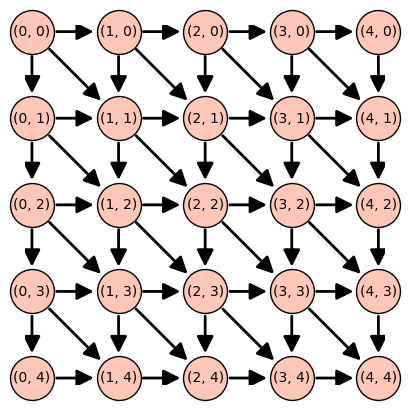

In [23]:
lista_pos= [ (v,[100*v[0],10000-100*v[1]]) for v in DJ2.vertices() ]
posiciones=dict( lista_pos)
DJ2.plot(pos=posiciones,figsize=6,vertex_size=1000)

In [24]:
kernel(DJ2)

[(0, 0), (0, 2), (0, 4), (2, 0), (2, 2), (2, 4), (4, 0), (4, 2), (4, 4)]

<p>A la vista del núcleo del grafo vemos que esta vez la estrategia ganadora es para el jugador que mueve en segundo lugar. El que comienza lo hace desde la posición $(0,0)$ que está en el núcleo y deberá mover la ficha a $(1,0), (0,1)$ ó $(1,1)$, que son de fuera del núcleo. Desde cualquiera de esas posiciones el siguiente jugador puede ocupar una casilla del núcleo (serían las casillas $(2,0)$, $(0,2)$ ó $(2,2)$ respectivamente).</p>

In [ ]:
#Realizar diferentes pruebas del juego con distintos valores de n y m

<p><strong>EJERCICIO 2:</strong> Consideremos ahora la variante del juego anterior (llegar a la meta), en el que se juega sobre una cuadrícula de tamaño $7\times 8$ y cada jugador puede moverse una o dos posiciones a la derecha o una o dos posiciones hacia abajo y no en diagonal.</p>
<p>a) Diseñar el grafo que modela el juego y obtener una estrategia ganadora. ¿Quién tiene las de ganar?</p>
<p>b) Si un jugador se situa en la casilla $(3,5)$, ¿qué movimiento ha de hacer el otro jugador para ganar la partida?</p>

In [34]:
'''
A) Varios valores de n y m ¡VERSIÓN ITERATIVA!
'''

n = [0..9]
m = [0..9]
E2 = DiGraph()

for n,m in zip(n,m):
    V = [(i,j) for (i,j) in cartesian_product([[0..n],[0..m]])]     
    A1 = [((i,j),(i,j+1)) for (i,j) in V if j<m]
    A2 = [((i,j),(i+1,j)) for (i,j) in V if i<n]
    A3 = [((i,j),(i,j+2)) for (i,j) in V if j<m-1]
    A4 = [((i,j),(i+2,j)) for (i,j) in V if i<n-1]
    E2.add_vertices(V)
    E2.add_edges(A1)
    E2.add_edges(A2)
    E2.add_edges(A3)
    E2.add_edges(A4)
    #plot(E2)

In [42]:
# VERSIÓN NO ITERATIVA! EJECUTAR ESTA PARA EL RESTO DEL EJERCICIO
n = 6
m = 7
E2 = DiGraph()

V = [(i,j) for (i,j) in cartesian_product([[0..n],[0..m]])]     
A1 = [((i,j),(i,j+1)) for (i,j) in V if j<m]
a2 = [((i,j),(i+1,j)) for (i,j) in V if i<n]
A3 = [((i,j),(i,j+2)) for (i,j) in V if j<m-1]
A4 = [((i,j),(i+2,j)) for (i,j) in V if i<n-1]
E2.add_vertices(V)
E2.add_edges(A1)
E2.add_edges(A2)
E2.add_edges(A3)
E2.add_edges(A4)
#plot(E2)

In [43]:
# Para obtener la estrategia, representamos el tablero donde se ve la jugada: no ejecutar si lo anterior no funciona!
posiciones = [(v,[100*v[0]+10*(-1)^v[1],10000-100*v[1]+10*(-1)^v[0]]) for v in E2.vertices()]
diccionario = dict(posiciones)
# E2.plot(pos=diccionario, figsize=15, vertex_size=1000)
# Si representamos el kernel vemos que gana el jugador que comienza, pq entra dentro de los valores del kernel con (0,1) o (2,0)
kernel(E2)

[(0, 2),
 (0, 5),
 (1, 0),
 (1, 3),
 (1, 6),
 (1, 8),
 (1, 9),
 (2, 1),
 (2, 4),
 (2, 7),
 (3, 2),
 (3, 5),
 (3, 8),
 (3, 9),
 (4, 0),
 (4, 3),
 (4, 6),
 (5, 1),
 (5, 4),
 (5, 7),
 (5, 8),
 (5, 9),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 9)]

In [44]:
'''
B) Debe moverse a las posiciones que pertenezcan al núcelo dentro de los vecinos.
'''

E2.neighbors_out((3,5))

[(4, 5), (3, 7), (5, 5), (3, 6)]

<p><a name="indep-clique"></a><strong style="font-size: 1.5em;">3. Números de independencia y de clique de un grafo.</strong></p>
<p>Definimos el <strong>número de independencia $\alpha(G)$</strong> de un grafo $G$ como el  tamaño del mayor conjunto independiente de vértices de dicho grafo. Recordemos que un conjunto de vértices de G se dice que es independiente si no contiene ninguna pareja de vértices adyacentes.</p>

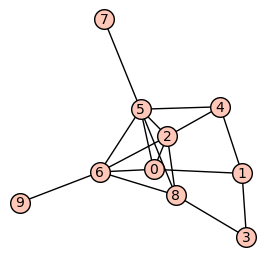

In [45]:
G1=graphs.RandomGNP(10,0.5)
G1.plot(figsize=4)

<p>Aunque el problema de encontrar el número de independencia de un grafo es un problema <strong>NP-duro</strong>, Sage dispone de herramientas para calcular el número de independencia de un grafo <strong>$G$ </strong>(o digrafo) en grafos no muy complejos.  Sage dispone del método "<em>independent_set<strong>" </strong></em>que busca <span style="text-decoration: underline;">un</span> conjunto máximo de vértices independientes (nótese que dicho conjunto no tiene por qué ser único).</p>

In [47]:
Indep=G1.independent_set()
print(Indep)

[0, 3, 4, 7, 9]


<p>Para obtener el número de independencia del grafo $G$ (<strong>$\alpha(G)$</strong>) bastará calcular el tamaño de este conjunto independiente:</p>

In [48]:
len(Indep)

5

<p>O bien, podemos usar directamente el método "<em>independent_set</em>" con el parámetrro "<em>value_only=True</em>"</p>

In [49]:
G1.independent_set(value_only=True)

5

<p>El siguiente grupo de ejecución representa el grafo, poniendo los vértices del conjunto independiente de un color diferente para resaltarlos.</p>

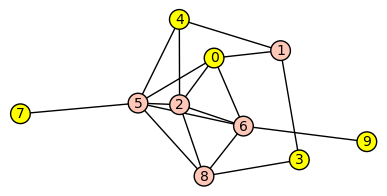

In [50]:
colores={'yellow':Indep}
G1.plot(vertex_colors=colores,figsize=4)

<p>OJO!! Para algunos grafos el dibujo puede llevar a engaño, pues puede parecer que hay aristas entre los vértices independientes debido a la posición de los vértices. Pruébese a hacer distintas representaciones del grafo para comprobar que en efecto se trata de conjuntos independientes de vértices.</p>

<p>Este concepto de conjunto independiente de vértices puede utilizarse para resolver multitud de problemas. Véase el siguiente ejemplo.</p>
<p><strong>EJEMPLO 3</strong>: ¿Cuál es el mayor tamaño de un conjunto de números enteros entre $n_1$ y $n_2$ (por ejemplo, entre $1$ y $16$) de modo que para cualquier par de ellos se verifica que su diferencia no es el cuadrado de ningún otro número?</p>
<p>Este problema lo podemos trasladar a grafos de la siguiente forma: Encontrar el mayor conjunto independiente de vértices en el grafo cuyos vértices son todos los enteros entre $n_1$ y $n_2$ y dos vértices son adyacentes si su diferencia (en valor absoluto) es un cuadrado perfecto:</p>

In [51]:
n1=1
n2=16
G2=Graph()
G2.add_vertices([n1..n2])
edges=[(i,j) for (i,j) in cartesian_product([G2.vertices(),G2.vertices()]) if (i!=j and is_square(abs(i-j)) )]
G2.add_edges(edges)

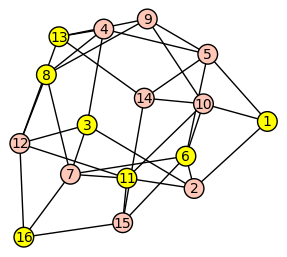

In [52]:
colores={'yellow':G2.independent_set()}
G2.plot(vertex_colors=colores,figsize=4)

In [53]:
print(G2.independent_set())
print(G2.independent_set(value_only=True))

[1, 3, 6, 8, 11, 13, 16]
7


<p> </p>
<p> </p>
<p>Este problema también lo podíamos haber planteado usando el grafo complementario del anterior, es decir el grafo cuyos vértices fuesen los mismos y dos vértices fuesen adyacentes si sus diferencias <strong>NO</strong> son el cuadrado de ningún entero.</p>

In [54]:
n1=1
n2=16
H=Graph()
H.add_vertices([n1..n2])
edges=[(i,j) for (i,j) in cartesian_product([H.vertices(),H.vertices()]) if not (is_square(abs(i-j)) )]
H.add_edges(edges)

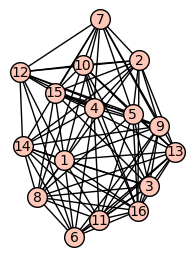

In [55]:
H.plot(figsize=4)

In [56]:
H.is_isomorphic(G2.complement())

True

<p>En este caso para resolver el problema deberíamos encontrar el mayor conjunto de vértices tales que cualesquiera dos son adyacentes, esto está relacionado con el concepto de "<strong>clique</strong>".</p>
<p><span>En teoría de grafos, un </span><strong>clique</strong><span> en un grafo no dirigido </span><em>G</em><span> es un subconjunto de vértices que son mutuamente adyacentes en G</span><span>. En otras palabras, el subgrafo inducido por los vértices del clique es un grafo completo.</span></p>
<p>El Problema del clique, que consiste en dado un grafo, decidir si existe en él un clique con un tamaño particular, es NP-completo, (del mismo modo que el problema equivalente de encontrar el número de independencia de un grafo), no obstante para grafos no demasiado grandes, Sage encuentra todos los cliques. Con la siguiente instrucción le pedimos que nos muestre los <strong>cliques maximales</strong>, es decir aquellos cliques que no están contenidos en otro clique mayor. </p>

In [57]:
H.cliques_maximal()

[[10, 2, 4, 7, 12, 15],
 [10, 2, 4, 16],
 [10, 2, 5, 7, 12, 15],
 [10, 2, 5, 7, 13, 15],
 [10, 2, 5, 8, 13, 15],
 [10, 2, 5, 8, 13, 16],
 [10, 3, 5, 8, 13, 15],
 [10, 3, 5, 8, 13, 16],
 [1, 3, 6, 8, 11, 13, 16],
 [1, 3, 6, 8, 11, 14, 16],
 [1, 3, 6, 9, 11, 14, 16],
 [1, 3, 8, 13, 15],
 [1, 3, 9, 15],
 [1, 4, 6, 9, 11, 14, 16],
 [1, 4, 6, 9, 12, 14],
 [1, 4, 7, 9, 12, 14],
 [1, 4, 7, 9, 12, 15],
 [1, 7, 13, 15],
 [2, 4, 7, 9, 12, 14],
 [2, 4, 7, 9, 12, 15],
 [2, 4, 9, 14, 16],
 [2, 8, 14, 16],
 [3, 5, 8, 11, 13, 16]]

<p>De todos ellos se llaman <strong>cliques máximos</strong> a aquellos que tiene mayor cardinal. En Sage la orden siguiente obtiene todos los cliques máximos de un grafo.</p>
<p>Observa que uno de ellos debe coincidir con el conjunto máximo de vértices independientes del grafo que obtuvimos anteriormente y que coincidía con su complementario.</p>

In [58]:
H.cliques_maximum()

[[1, 3, 6, 8, 11, 13, 16],
 [1, 3, 6, 8, 11, 14, 16],
 [1, 3, 6, 9, 11, 14, 16],
 [1, 4, 6, 9, 11, 14, 16]]

<p>Al cardinal de los cliques máximos se le llama<strong> número de clique del grafo</strong> y se representa por $\omega(G)$.</p>
<p>La siguiente instrucción nos da el número de clique.</p>

In [59]:
H.clique_number()

7

<p>Vamos a comprobar que el subgrafo inducido por los 7 vértices correspondientes forman en efecto un grafo $K_7$.</p>
<p>NOTA: El método "<em>subgraph(lista)</em>" nos proporciona el subgrafo inducido por los vértices de <em>lista</em>.</p>

In [60]:
mi_clique=H.subgraph(H.cliques_maximum()[3])
mi_clique.is_isomorphic(graphs.CompleteGraph(7))

True

<p>Dibujamos el grafo $H$ resaltando los vértices del clique máximo.</p>

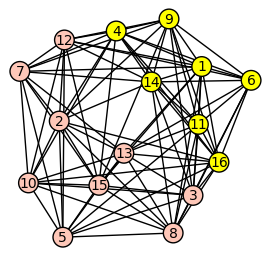

In [61]:
d={'yellow':H.cliques_maximum()[3]}
H.plot(vertex_colors=d,figsize=4, layout='spring')

<p><strong>EJERCICIO 3</strong>:  ¿Cual es el mayor tamaño de un conjunto de números primos entre sí que hay entre $20$ y $40$, ambos inclusive?</p>
<p>NOTA: En Sage, la función "<em>gcd(a,b)</em>" devuelve el máximo común divisor de <em>a</em> y <em>b</em>.</p>

In [64]:
n=20
m=40
E3=Graph()
E3.add_vertices([n..m])
A = [(i,j) for (i,j) in cartesian_product([E3.vertices(),E3.vertices()]) if (gcd(i,j)==1)]
E3.add_edges(A)

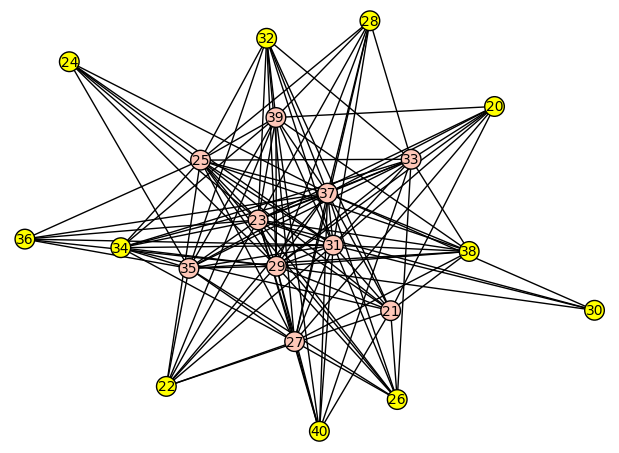

In [66]:
colores={'yellow':E3.independent_set()}
E3.plot(vertex_colors=colores, figsize=7)

<p>En el siguiente problema aparecen los dos conceptos anteriores relacionados:</p>
<p><strong>EJEMPLO 4</strong>: Probar que en cualquier grupo de 6 personas siempre hay 3 de ellas que se conocen mutuamente o bien tres que se desconocen entre ellas.</p>
<p> Este problema podemos modelarlo mediante un grafo de modo que cada persona sería un vértice y dos vértices serán adyacentes si las personas a las que representan se conocen entre ellas. Así la afirmación anterior en términos de grafos sería:</p>
<p>"Cualquier grafo de 6 vértices o bien contiene un conjunto independiente de 3 vértices o un clique de orden 3" o lo que es lo mismo "En cualquier grafo de 6 vértices uno de estos dos parámetros anterores, número de clique o número de independencia, es mayor o igual que 3".</p>
<p>Lo vamos a comprobar calculando el número de independencia y el número de clique de todos los grafos de 6 vértices. En Sage la orden "<strong>graphs(n)</strong>" nos proporciona la lista de todos los grafos de n vértices. La siguiente orden muestra tales grafos</p>

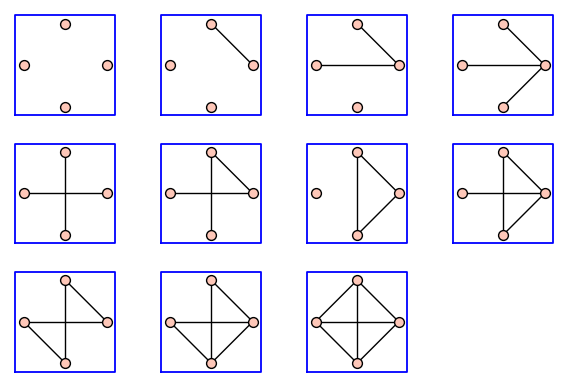

In [67]:
graphs_list.show_graphs(graphs(4))

In [69]:
s=True
for P in graphs(6):
    ind=P.independent_set(value_only=True)
    cl=P.clique_number()
    if ind<3 and cl<3:
        print('Este grafo tiene numero de clique:',cl, 'y numero de independencia:',ind)
        show(P)
        s=False
        break
        
if s:
    print('Cualquier grafo de 6 vértices o contiene un K3 o un conjunto independiente de 3 vértices')

Cualquier grafo de 6 vértices o contiene un K3 o un conjunto independiente de 3 vértices


<p><strong>EJERCICIO 4</strong>: ¿Es cierto que en cualquier grupo de 7 personas o hay 4 que se conocen mutuamente o hay 3 que son mutuamente desconocidas?</p>

In [ ]:
# El mismo código pero cambiado el grafo por 7 y 3

Este grafo tiene numero de clique: 3 y numero de independencia: 2


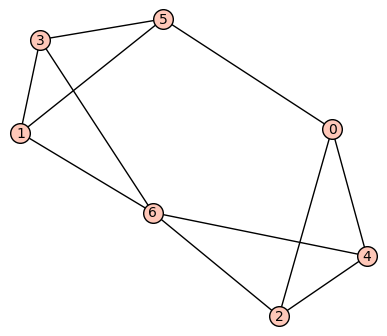

In [72]:
s=True
for E4 in graphs(7):
    ind=E4.independent_set(value_only=True)
    cl=E4.clique_number()
    if ind<3 and cl<4:
        print('Este grafo tiene numero de clique:',cl, 'y numero de independencia:',ind)
        show(E4)
        s=False
        break
        
if s:
    print('Cualquier grafo de 6 vértices o contiene un K3 o un conjunto independiente de 3 vértices.')

<h1><a name="cuestiones"></a><strong>Otros ejercicios propuestos<br /></strong></h1>
<p><strong>EJERCICIO 5.</strong></p>
<p>Se considera la variante del juego "<em>llegar a la meta</em>" (en un tablero $5\times 5$) en la que <span>pierde</span> el jugador que llegue a la meta.</p>
<p>a) Diseñar, si existe, una estrategia ganadora para este caso. ¿Quién tiene las de ganar, el jugador que comienza o el segundo en mover? </p>
<p>b) En un determinado momento del juego, después del movimiento de nuestro adversario la ficha se encuentra en la posición $(2,3)$, ¿cuál debe ser nuestro siguiente movimiento?</p>
<p> </p>

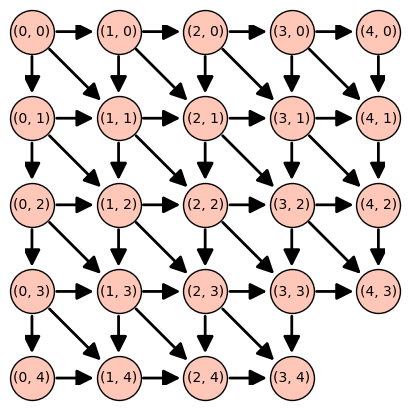

In [74]:
'''
A)
'''

E5 = copy(DJ2)
# Eliminar el vértice gaandor (primer apartado!)
E5.delete_vertex((4, 4)) 
# Representamos la jugada:
posiciones= [(v,[100*v[0],10000-100*v[1]]) for v in E5.vertices()]
diccionario = dict(posiciones)
E5.plot(pos=diccionario, figsize=6, vertex_size=1000)

In [75]:
'''
Tendrá las de ganar el segundo en jugar, ya que el primer movimiento lleva forzosamente 
a posiciones fuera del núcleo -> (1,0)(0,1)(1,1).
'''

kernel(E5)

[(0, 0), (0, 2), (1, 4), (2, 0), (2, 2), (3, 4), (4, 1), (4, 3)]

In [76]:
'''
B) Partiendo de (2,3) nos movemos a los vecinos que pertenezcan al núcleo.
'''

E5.neighbors_out((2,3))

[(3, 4), (3, 3), (2, 4)]

<p><strong><strong>EJERCICIO</strong> 6:</strong> Este es un juego para dos jugadores. Sobre una mesa hay dos montones de fósforos con siete fósforos cada uno. Cada jugador, por turno, puede coger un fósforo del montón que elija o un fósforo de cada montón. Pierde el que coge el último fósforo.</p>
<p>a) ¿Tiene ventaja alguno de los jugadores? Si es así, ¿cuál debe ser su primer movimiento?</p>
<p>b) En un determinado momento de la partida quedan 5 fósforos en un montón y 6 en el otro, ¿cuál debe ser nuestro siguiente movimiento? ¿y si quedan 4 fósforos en uno y 2 en otro?</p>
<p>c) ¿Qué pasaría si tuviéramos dos montones con un número diferente de fósforos?</p>
<p>d) ¿Qué pasaría si ganase el jugador que coge el último fósforo?</p>

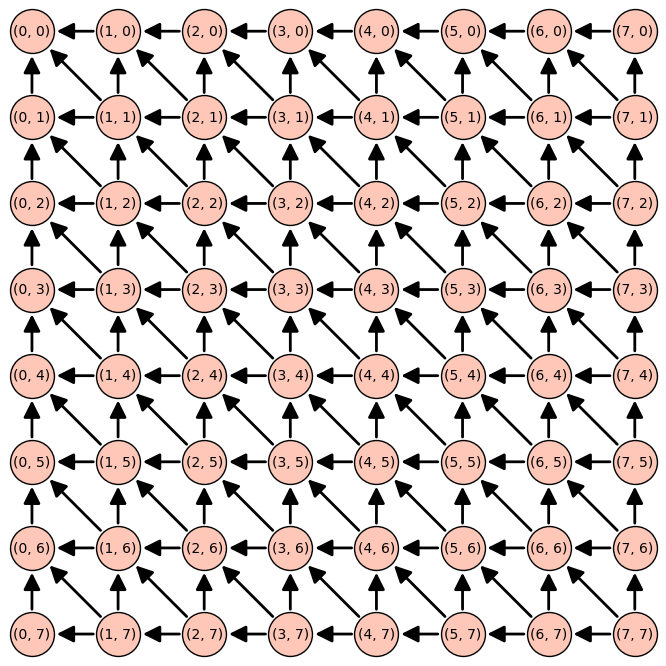

In [77]:
'''
Mismo código que el ejercicio 2; es el mismo grafo pero el último valor es el último fósforo; pierde el jugador que lo tome.
'''

n = 7
m = 7
E6 = DiGraph()

# Si i son los fósforos del primer monton y j los del segundo:
V = [(i,j) for (i,j) in cartesian_product([[0..n],[0..m]])]
A1 = [((i,j+1),(i,j)) for (i,j) in V if j<m]
A2 = [((i+1,j),(i,j)) for (i,j) in V if i<n]
A3 = [((i+1,j+1),(i,j)) for (i,j) in V if (i<n and j<m)]
E6.add_vertices(V)
E6.add_edges(A1)
E6.add_edges(A2)
E6.add_edges(A3)

# Representamos el problema
posiciones = [(v,[100*v[0],10000-100*v[1]]) for v in E6.vertices()]
diccionario = dict(posiciones)
E6.plot(pos=diccionario, figsize=10, vertex_size=1000)

In [89]:
'''
A) ¿Tiene ventaja alguno de los jugadores? Si es así, ¿cuál debe ser su primer movimiento?

Si 7,7 es el comienzo, 0,0 es condición de derrota.
Si el jugador que comienza solo toma un fósforo cada vez, será ganador.
'''

kernel(E6)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (1, 0),
 (2, 2),
 (2, 4),
 (2, 6),
 (3, 0),
 (4, 2),
 (4, 4),
 (4, 6),
 (5, 0),
 (6, 2),
 (6, 4),
 (6, 6),
 (7, 0)]

In [83]:
'''
B) En un determinado momento de la partida quedan 5 fósforos en un montón y 6 en el otro, 
¿cuál debe ser nuestro siguiente movimiento? ¿y si quedan 4 fósforos en uno y 2 en otro?

Si obtenemos los vecinos a (5,6), no podemos tomar los que pertenezcan al núcleo; luego solo podemos quitar del monton 5.
En el caso (4,2) es irrelevante, ninguno pertecene al núcleo.
'''

print("Caso (5,6): " + str(E6.neighbors_out((5,6))))
print("Caso (4,2): " + str(E6.neighbors_out((4,2))))

Caso (5,6): [(4, 5), (5, 5), (4, 6)]
Caso (4,2): [(3, 2), (3, 1), (4, 1)]


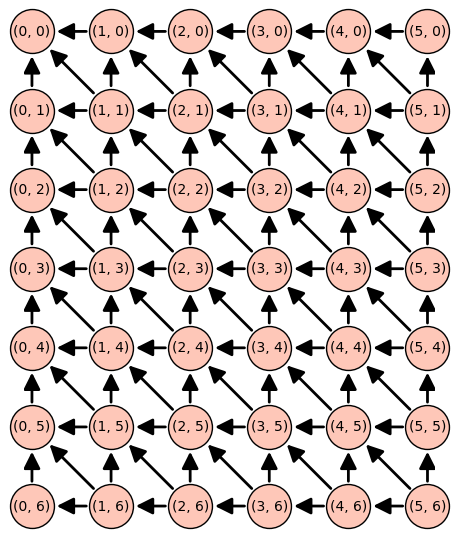

In [90]:
'''
C) ¿Qué pasaría si tuviéramos dos montones con un número diferente de fósforos?

Para un caso 5 y 6 por ejemplo: representamos el problema de nuevo (mismo código con otros valores):
'''

n = 5
m = 6
E62 = DiGraph()

V = [(i,j) for (i,j) in cartesian_product([[0..n],[0..m]])]
A1 = [((i,j+1),(i,j)) for (i,j) in V if j<m]
A2 = [((i+1,j),(i,j)) for (i,j) in V if i<n]
A3 = [((i+1,j+1),(i,j)) for (i,j) in V if (i<n and j<m)]
E62.add_vertices(V)
E62.add_edges(A1)
E62.add_edges(A2)
E62.add_edges(A3)

# Representamos el problema
posiciones = [(v,[100*v[0],10000-100*v[1]]) for v in E62.vertices()]
diccionario = dict(posiciones)
E62.plot(pos=diccionario, figsize=8, vertex_size=1000)

In [91]:
''' 
Misma idea; sigue ganando el primero en jugar si toma un fósforo cada vez (si arrancamos en 5,6 y pierde el que llegue a 0,0).
'''

E62.delete_vertex((0,0))
kernel(E62)

[(0, 1),
 (0, 3),
 (0, 5),
 (1, 0),
 (2, 2),
 (2, 4),
 (2, 6),
 (3, 0),
 (4, 2),
 (4, 4),
 (4, 6),
 (5, 0)]

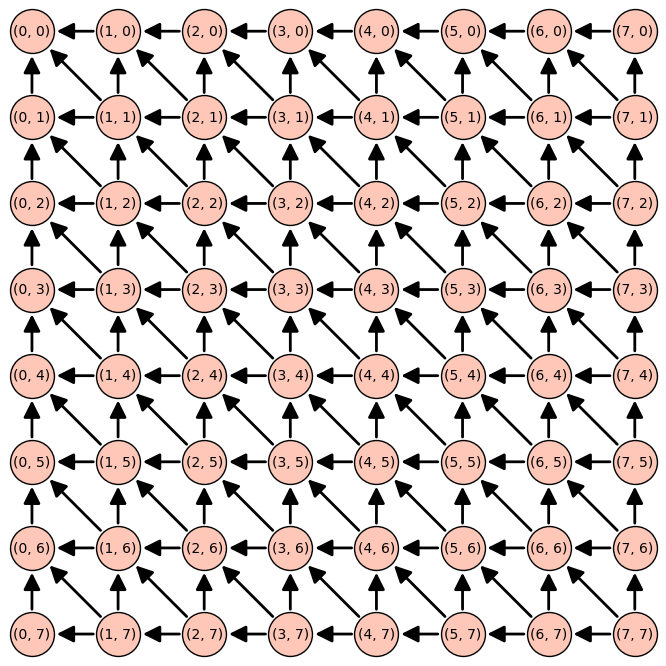

In [94]:
'''
D) ¿Qué pasaría si ganase el jugador que coge el último fósforo?

Definimos el MISMO problema original de nuevo pero (0,0) no es perder; 
'''

n = 7
m = 7
E63 = DiGraph()

V = [(i,j) for (i,j) in cartesian_product([[0..n],[0..m]])]
A1 = [((i,j+1),(i,j)) for (i,j) in V if j<m]
A2 = [((i+1,j),(i,j)) for (i,j) in V if i<n]
A3 = [((i+1,j+1),(i,j)) for (i,j) in V if (i<n and j<m)]
E63.add_vertices(V)
E63.add_edges(A1)
E63.add_edges(A2)
E63.add_edges(A3)

# Representamos el problema
posiciones = [(v,[100*v[0],10000-100*v[1]]) for v in E63.vertices()]
diccionario = dict(posiciones)
E63.plot(pos=diccionario, figsize=10, vertex_size=1000)

In [95]:
'''
Si (0,0) no es derrota; sigue ganando el jugador que comienza PERO si comienza tomando dos fósforos!
'''

kernel(E63)

[(0, 0),
 (0, 2),
 (0, 4),
 (0, 6),
 (2, 0),
 (2, 2),
 (2, 4),
 (2, 6),
 (4, 0),
 (4, 2),
 (4, 4),
 (4, 6),
 (6, 0),
 (6, 2),
 (6, 4),
 (6, 6)]

<p><strong><strong>EJERCICIO</strong> 7. </strong>Este es un juego para dos jugadores, A y B. Se coloca un montón de 45 piedrecillas sobre la mesa. Juega A y puede quitar entre 1 y 7 piedras. Juega B y puede quitar entre 1 y 7 piedras. Empieza jugando A. Gana el que se lleve la última piedra. ¿Hay alguna estrategia para alguno de los jugadores, de modo que esté seguro de ganar? ¿Cómo varía la situación cuando se varía el número de piedras? ¿Y si pierde el que se lleve la última?</p>

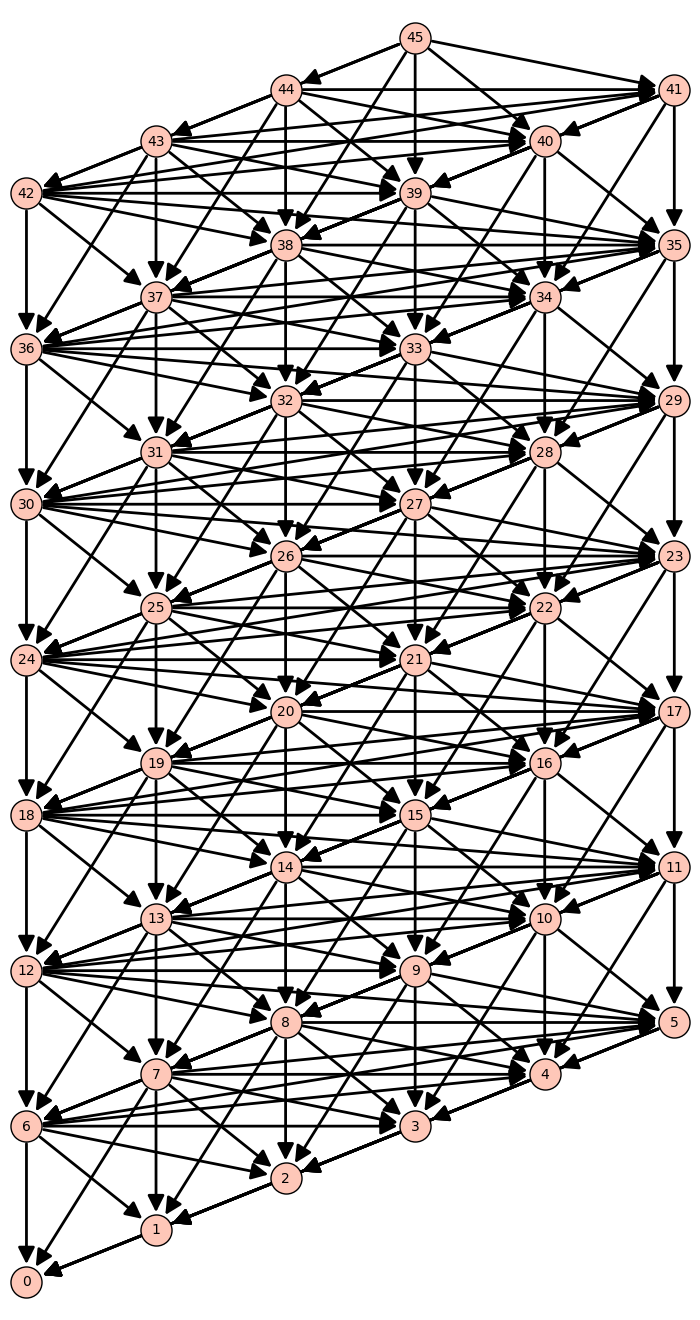

In [96]:
'''
Definimos el juego de forma similar al problema anterior; de 0 a 45 valores posibles:
'''

n = 45
V = [0..n]
E = [(i,j) for (i,j) in cartesian_product([V,V]) if (i-8<j<i)]
E7 = DiGraph()
E7.add_vertices(V)
E7.add_edges(E)

# Representamos el problema
posiciones = [(i,[100*(i%6),20*(i+(i)%6)]) for i in [0..n]]
diccionario = dict(posiciones)
E7.plot(pos=diccionario, figsize=20, vertex_size=500)

In [97]:
'''
¿Hay alguna estrategia para alguno de los jugadores, de modo que esté seguro de ganar? 
¿Cómo varía la situación cuando se varía el número de piedras? 
¿Y si pierde el que se lleve la última?
'''

kernel(E7)

[0, 8, 16, 24, 32, 40]

In [ ]:
'''
Si A comienza a jugar, ganará si quita 5 piedras; si 45 - 5 = 40 E núcleo; el jugador B siempre quitará 
piedras en un nº que NO entra en el núcleo; mientras que A solo debe seguir quitando el nº de piedras 
necesarias para seguir dentro del núcleo.

Si el nº de piedras cambia; siempre que pueda quitar entre 1 y 7; el jugador A ganará si sigue comenzando 
siempre que calcule el nº de piedras a quitar como n módulo 8.
'''

In [98]:
'''
Si pierde el que se lleva la última; eliminamos la última: sigue ganando el jugador A que comienza; solo que en lugar de quitar
5 piedras, deberá quitar 4 para entrar en el núcleo.
'''

E72 = copy(E7)
E72.delete_vertex(0)
kernel(E72)

[1, 9, 17, 25, 33, 41]

<p><strong>EJERCICIO 8</strong>. En el <strong>juego del NIM</strong> , de origen posiblemtente chino por su parecido con el juego llamado Jianshizi, dos jugadores colocan un número arbitrario de fichas (cerillas, palillos, guijarros, puchis) sobre una superficie, separadas en filas o grupos. Tanto el número de filas como el número de fichas en cada fila son también arbitrarios. El primer jugador toma cualquier número de fichas de una fila, entre uno y el total de la fila, pero sólo de una fila. El siguiente jugador hace su jugada de manera similar, retirando algunos de las fichas que quedan, y los jugadores van alternándose en sus jugadas. Se puede jugar de modo que gane el que retire la última ficha, que es el modo más fácil, o el "<em>modo miseria</em>" en el que perdería el que retire la última ficha.</p>
<p><img style="display: block; margin-left: auto; margin-right: auto;" src="NIM-game.jpg" alt="" width="267" height="250" /></p>
<p>Para el caso de la figura (tres filas, con 5, 3 y 4 fichas, respectivamente), modelar el juego mediante un digrafo y establecer una estrategia ganadora,</p>
<p>a) Si gana el jugador que retira la última ficha.</p>
<p>b) Si pierde el jugador que retira la última ficha (<em>modo miseria</em>).</p>

In [101]:
'''
A) Si gana el jugador que retira la última ficha.

Definimos el juego de forma similar a los problemas anteriores:
'''

n = 5
m = 3
r = 4
E8 = DiGraph()

V = [(i,j,k) for (i,j,k) in cartesian_product([[0..n],[0..m],[0..r]])]
E8.add_vertices(V)
for (i,j,k) in cartesian_product([[0..n],[0..m],[0..r]]):
    for f in [1..i]:
        E8.add_edge(((i,j,k),(i-f,j,k)))
    for f in [1..j]:
        E8.add_edge(((i,j,k),(i,j-f,k)))
    for f in [1..k]:
        E8.add_edge(((i,j,k),(i,j,k-f)))

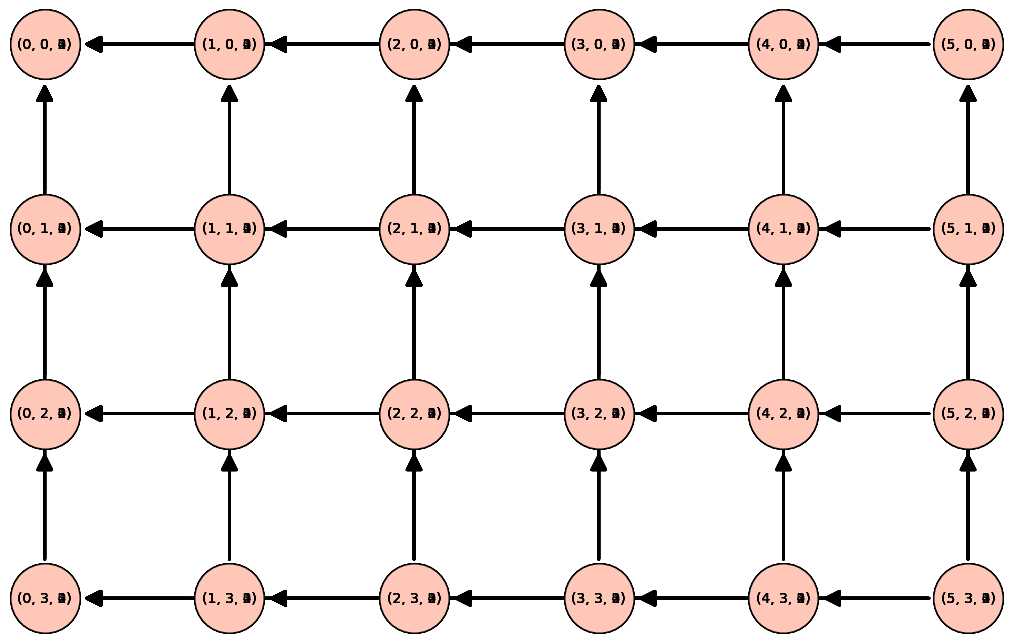

In [105]:
# Representamos el problema
posiciones = [(v,[100*v[0],10000-100*v[1],10-100*v[2]]) for v in E8.vertices()]
diccionario = dict(posiciones)
E8.plot(pos=diccionario, figsize=10, vertex_size=2500)

In [106]:
'''
Ganará de nuevo el primer jugador siempre que comienze quitando dos fichas de la segunda fila.
'''

kernel(E8)

[(0, 0, 0),
 (0, 1, 1),
 (0, 2, 2),
 (0, 3, 3),
 (1, 0, 1),
 (1, 1, 0),
 (1, 2, 3),
 (1, 3, 2),
 (2, 0, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 3, 1),
 (3, 0, 3),
 (3, 1, 2),
 (3, 2, 1),
 (3, 3, 0),
 (4, 0, 4),
 (5, 1, 4)]

In [107]:
'''
B) Similar a los problemas anteriores; eliminamos el (0,0,0): igualmente ganará el primer jugador si comienza quitando dos fichas.
'''

E82 = copy(E8)
E82.delete_vertex((0,0,0))
kernel(E82)

[(0, 0, 1),
 (0, 1, 0),
 (0, 2, 2),
 (0, 3, 3),
 (1, 0, 0),
 (1, 1, 1),
 (1, 2, 3),
 (1, 3, 2),
 (2, 0, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 3, 1),
 (3, 0, 3),
 (3, 1, 2),
 (3, 2, 1),
 (3, 3, 0),
 (4, 0, 4),
 (5, 1, 4)]

<p><strong>EJERCICIO 9</strong>: Encontrar el mayor tamaño de un conjunto de números, menores que 500, de forma que dos cualesquiera de ellos puedan ser catetos de un triángulo rectángulo cuyos tres lados son enteros.</p>

In [108]:
n=500
V=[1..n]
E9=Graph()
E9.add_vertices(V)

for (i,j) in cartesian_product ([V,V]):
    if i!=j:
        s=i^2+j^2
        if s.is_square():
            E9.add_edge(i,j)

In [111]:
print("Tamaño máximo: " + str(E9.clique_number()))

Tamaño máximo: 3
